A notebook dedicated to FLUXNET AET estiamtion paper

<hr color="#e0ece4"; size="3";> 

# Tools

<hr color="#e0ece4"; size="3";>

In [1]:
# %cd C:\Users\amaa2002\Google Drive

import my_Py_package
from my_Py_package.to_R import to_r, from_r
from my_Py_package.tools import plot_feat_imp, plot_pca_var, grid_result, high_corr_inds


import numpy as np
from numpy.random import seed
import itertools
import pandas as pd
import pickle

import joblib
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import rcParams

style.use("seaborn-white")
rcParams['figure.figsize'] = [15, 9]
rcParams['font.size'] = 24
rcParams['font.weight'] = 'bold'
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.labelsize'] = 18
rcParams['axes.labelweight'] = 'bold'

# my brother R
import rpy2
from rpy2.robjects import r 
%reload_ext rpy2.ipython

import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
plotly.io.renderers.default = "colab"


%config InlineBackend.figure_format = 'retina'
%xmode Verbose      
%config IPCompleter.greedy=True


<IPython.core.display.Javascript object>

Your package has loaded successfully and has got the job done!
Exception reporting mode: Verbose


<br><br><br>

# Best parameters for each model

## A function to read the cv result 

In [3]:


def tune_results2(path_to_pkl, best=0, n_samples=50):
  '''
  from pickled to result dataframe. 
  '''
  import warnings
  warnings.simplefilter(action = "ignore", category = UserWarning)
  
  with open(path_to_pkl, "rb") as f:
    pkl_dic = pickle.load(f)
  
  # cv results
  grid = pd.DataFrame(pkl_dic["grid_search"].cv_results_)

  # test target means
  test_means = pkl_dic["means_test"]

  # train target means
  train_means = pkl_dic["means_train"]

  l_cols = grid.columns.values.copy() # this is names of columns in the df grid 


  # indices of mae splits

  # test
  i1 = np.where(l_cols == "split0_test_neg_mean_absolute_error")[0][0]
  i2 = i1 + n_samples

  


  # median and std of test/train mae : all rows of grid! 
  test_mae = np.median(-100 * grid.iloc[:, i1:i2] / test_means, axis=1)
  test_mae_std = np.std(-100 * grid.iloc[:, i1:i2] / test_means, axis=1)
  test_mae_splits = -100 * grid.iloc[best, i1:i2] / test_means

  # train_mae = np.median(-100 * grid.iloc[:, i3:i4] / train_means, axis=1)
  # train_mae_std = np.std(-100 * grid.iloc[:, i3:i4] / train_means, axis=1)
  # train_mae_splits = -100 * grid.iloc[best, i3:i4] / train_means

  # test_r2 = np.median(grid.iloc[:, j1:j2] , axis=1)
  # test_r2_std = np.std(grid.iloc[:, j1:j2] , axis=1)
  # test_r2_splits = grid.iloc[best, j1:j2]

  # train_r2 = np.median(grid.iloc[:, j3:j4] , axis=1)
  # train_r2_std = np.std(grid.iloc[:, j3:j4] , axis=1)
  # train_r2_splits = grid.iloc[best, j3:j4]

  splits = {
      "test_mae" : test_mae_splits, 
      
      "params" : grid["params"].iloc[best]
  }


  # params : all rows
  params = grid["params"]

  # final dataframe
  df = pd.DataFrame({
      "test_mae" : test_mae, 
      "test_mae_sd" : test_mae_std, 
      


      
  })

  p_names = list(params[0].keys())
  for p in p_names:
    df[p] = grid["param_" + p]


  # i wanna have splits_scores vectors eh 




  return df.sort_values("test_mae"), splits


# from pickle to df results 
path_to_pkl = "/Users/alireza_amani/Google Drive/Papers/2_fluxnet/hourly_results/RF_fit_finalSet_2.pkl"

def tune_results3(path_to_pkl, best=0, n_samples=50):
  '''
  from pickled to result dataframe. 
  '''
  import warnings
  warnings.simplefilter(action = "ignore", category = UserWarning)
  
  with open(path_to_pkl, "rb") as f:
    pkl_dic = pickle.load(f)
  
  # cv results
  grid = pd.DataFrame(pkl_dic["grid_search"].cv_results_)

  # test target means
  test_means = pkl_dic["means_test"]

  # train target means
  train_means = pkl_dic["means_train"]

  l_cols = grid.columns.values.copy() # this is names of columns in the df grid 


  # indices of mae splits

  # test
  i1 = np.where(l_cols == "split0_test_neg_mean_absolute_error")[0][0]
  i2 = i1 + n_samples

  # train
  i3 = np.where(l_cols == "split0_train_neg_mean_absolute_error")[0][0]
  i4 = i3 + n_samples

  # indices of r2 splits

  


  # median and std of test/train mae : all rows of grid! 
  test_mae = -np.median(grid.iloc[:, i1:i2], axis=1)
  test_mae_std = np.std(grid.iloc[:, i1:i2] , axis=1)
  test_mae_splits = -grid.iloc[best, i1:i2] 

  train_mae = -np.median(grid.iloc[:, i3:i4] , axis=1)
  train_mae_std = np.std(grid.iloc[:, i3:i4] , axis=1)
  train_mae_splits = -grid.iloc[best, i3:i4] 

  

  splits = {
      "test_mae" : test_mae_splits, 
      "train_mae" : train_mae_splits, 
      
      "params" : grid["params"].iloc[best]
  }


  # params : all rows
  params = grid["params"]

  # final dataframe
  df = pd.DataFrame({
      "test_mae" : test_mae, 
      "test_mae_sd" : test_mae_std, 
      "train_mae" : train_mae, 
      "train_mae_sd" : train_mae_std

      
  })

  p_names = list(params[0].keys())
  for p in p_names:
    df[p] = grid["param_" + p]


  # i wanna have splits_scores vectors eh 




  return df.sort_values("test_mae"), splits

def tune_results(path_to_pkl, best=0, n_samples=50):
  '''
  from pickled to result dataframe. 
  '''
  import warnings
  warnings.simplefilter(action = "ignore", category = UserWarning)
  
  with open(path_to_pkl, "rb") as f:
    pkl_dic = pickle.load(f)
  
  # cv results
  grid = pd.DataFrame(pkl_dic["grid_search"].cv_results_)

  # test target means
  test_means = pkl_dic["means_test"]

  # train target means
  train_means = pkl_dic["means_train"]

  l_cols = grid.columns.values.copy() # this is names of columns in the df grid 


  # indices of mae splits

  # test
  i1 = np.where(l_cols == "split0_test_neg_mean_absolute_error")[0][0]
  i2 = i1 + n_samples

  # train
  i3 = np.where(l_cols == "split0_train_neg_mean_absolute_error")[0][0]
  i4 = i3 + n_samples

  # indices of r2 splits

  # # test
  # j1 = np.where(l_cols == "split0_test_r2")[0][0]
  # j2 = j1 + n_samples

  # # train
  # j3 = np.where(l_cols == "split0_train_r2")[0][0]
  # j4 = j3 + n_samples


  # median and std of test/train mae : all rows of grid! 
  test_mae = np.median(-100 * grid.iloc[:, i1:i2] / test_means, axis=1)
  test_mae_std = np.std(-100 * grid.iloc[:, i1:i2] / test_means, axis=1)
  test_mae_splits = -100 * grid.iloc[best, i1:i2] / test_means

  train_mae = np.median(-100 * grid.iloc[:, i3:i4] / train_means, axis=1)
  train_mae_std = np.std(-100 * grid.iloc[:, i3:i4] / train_means, axis=1)
  train_mae_splits = -100 * grid.iloc[best, i3:i4] / train_means

  # test_r2 = np.median(grid.iloc[:, j1:j2] , axis=1)
  # test_r2_std = np.std(grid.iloc[:, j1:j2] , axis=1)
  # test_r2_splits = grid.iloc[best, j1:j2]

  # train_r2 = np.median(grid.iloc[:, j3:j4] , axis=1)
  # train_r2_std = np.std(grid.iloc[:, j3:j4] , axis=1)
  # train_r2_splits = grid.iloc[best, j3:j4]

  splits = {
      "test_mae" : test_mae_splits, 
      "train_mae" : train_mae_splits, 
      # "test_r2" : test_r2_splits, 
      # "train_r2" : train_r2_splits,
      "params" : grid["params"].iloc[best]
  }


  # params : all rows
  params = grid["params"]

  # final dataframe
  df = pd.DataFrame({
      "test_mae" : test_mae, 
      "test_mae_sd" : test_mae_std, 
      "train_mae" : train_mae, 
      "train_mae_sd" : train_mae_std, 
      # "test_r2" : test_r2, 
      # # "test_r2_std" : test_r2_std, 
      # "train_r2" : train_r2, 
      # "train_r2_sd" : train_r2_std, 


      
  })

  p_names = list(params[0].keys())
  for p in p_names:
    df[p] = grid["param_" + p]


  # i wanna have splits_scores vectors eh 




  return df.sort_values("test_mae"), splits


<IPython.core.display.Javascript object>

## Hourly

In [29]:
# %cd /Users/alireza_amani/OneDrive - USherbrooke/papers/2_fluxnet/hourly_results
%cd /Users/alireza_amani/Google Drive/Papers/2_fluxnet/hourly_datasets

<IPython.core.display.Javascript object>

/Users/alireza_amani/Google Drive/Papers/2_fluxnet/hourly_datasets


In [130]:
# set1
p1 = "light_full_hourly.pkl"
best = 0
df, d1 = tune_results3(p1, best, 715)
# df.drop(["bagging_freq"], 1, inplace = True)
df.head(10) # sdasadasd

<IPython.core.display.Javascript object>

,test_mae,test_mae_sd,train_mae,train_mae_sd,bagging_freq,feature_fraction,learning_rate,n_estimators,num_leaves,subsample
0,0.035066,0.003138,0.030026,0.001241,1,1,0.09,50,10,0.1


In [132]:
# set1
p1 = "knn_full_hourly.pkl"
best = 0
df, d1 = tune_results3(p1, best, 715)
# df.drop(["bagging_freq"], 1, inplace = True)
df.head(10)

<IPython.core.display.Javascript object>

,test_mae,test_mae_sd,train_mae,train_mae_sd,n_neighbors
0,0.035487,0.00319,0.030497,0.001306,321


In [124]:
# set1
p1 = "rf_noSMRAD_hourly.pkl"
best = 0
df, d1 = tune_results3(p1, best, 715)
# df.drop(["bagging_freq"], 1, inplace = True)
df.head(10)

<IPython.core.display.Javascript object>

,test_mae,test_mae_sd,train_mae,train_mae_sd,max_features,max_samples,min_samples_leaf,n_estimators
0,0.070818,0.007866,0.061294,0.002464,1,0.5,17,100


In [ ]:
# with open(p1, "rb") as f:
#   d1 = pickle.load(f)

d1["grid_search"].cv_results_

In [ ]:
## RF ------------------------------------------ 

# full
p1 = "rf_full_hourly.pkl"
best = 0
df, rf_full_hourly_best = tune_results3(p1, best, 715)


#  noSM
p3 = "rf_noSM_hourly.pkl"
best = 0
df, rf_noSM_hourly_best = tune_results3(p3, best, 715)

#  noSMRAD
p3 = "rf_noSMRAD_hourly.pkl"
best = 0
df, rf_noSMRAD_hourly_best = tune_results3(p3, best, 715)




## ExtraTree ------------------------------------------

# full
p1 = "ex_full_hourly.pkl"
best = 0
df, ex_full_hourly_best = tune_results3(p1, best, 715)
 

#  noSM
p3 = "ex_noSM_hourly.pkl"
best = 0
df, ex_noSM_hourly_best = tune_results3(p3, best, 715)

#  noSMRAD
p3 = "ex_noSMRAD_hourly.pkl"
best = 0
df, ex_noSMRAD_hourly_best = tune_results3(p3, best, 715)






## LightGBM ------------------------------------------

# full
p1 = "light_full_hourly.pkl"
best = 0
df, light_full_hourly_best = tune_results3(p1, best, 715)


#  noSM
p3 = "light_noSM_hourly.pkl"
best = 0
df, light_noSM_hourly_best = tune_results3(p3, best, 715)

#  noSMRAD
p3 = "light_noSMRAD_hourly.pkl"
best = 0
df, light_noSMRAD_hourly_best = tune_results3(p3, best, 715)





## KNN ------------------------------------------

# full
p1 = "knn_full_hourly.pkl"
best = 0
df, knn_full_hourly_best = tune_results3(p1, best, 715)


#  noSM
p3 = "knn_noSM_hourly.pkl"
best = 0
df, knn_noSM_hourly_best = tune_results3(p3, best, 715)

#  noSMRAD
p3 = "knn_noSMRAD_hourly.pkl"
best = 0
df, knn_noSMRAD_hourly_best = tune_results3(p3, best, 715)




<IPython.core.display.Javascript object>

### MAE

In [ ]:
# putting the results in dataframes to be sent to R   ## MAE ## 

# a function to help
def addit(df, p1, p2, p3, p4):
  global d1
  d2 = pd.DataFrame()
  d2["MAE"] = df[p1]
  d2["Model"] = p2
  d2["Split"] = p3
  d2["Set"] = p4
  
  d1 = pd.concat([d1, d2], axis=0)


# rf set1
d1 = pd.DataFrame()
d1["MAE"] = rf_full_hourly_best["train_mae"]
d1["Set"] = "Full Set"
d1["Model"] = "RF" 
d1["Split"] = "Train"

addit(rf_full_hourly_best, "test_mae", "RF", "Test", "Full Set")


# rf 



addit(rf_noSM_hourly_best, "test_mae", "RF", "Test", "Full Set - {Soil Moisture}")
addit(rf_noSM_hourly_best, "train_mae", "RF", "Train", "Full Set - {Soil Moisture}")

addit(rf_noSMRAD_hourly_best, "test_mae", "RF", "Test", "Full Set - {Soil Moisture, Incoming Radiation}")
addit(rf_noSMRAD_hourly_best, "train_mae", "RF", "Train", "Full Set - {Soil Moisture, Incoming Radiation}")



## ExT
addit(ex_full_hourly_best, "test_mae", "ExT", "Test", "Full Set")
addit(ex_full_hourly_best, "train_mae", "ExT", "Train", "Full Set")

addit(ex_noSM_hourly_best, "test_mae", "ExT", "Test", "Full Set - {Soil Moisture}")
addit(ex_noSM_hourly_best, "train_mae", "ExT", "Train", "Full Set - {Soil Moisture}")

addit(ex_noSMRAD_hourly_best, "test_mae", "ExT", "Test", "Full Set - {Soil Moisture, Incoming Radiation}")
addit(ex_noSMRAD_hourly_best, "train_mae", "ExT", "Train", "Full Set - {Soil Moisture, Incoming Radiation}")



## LightGBM
addit(light_full_hourly_best, "test_mae", "LGBM", "Test", "Full Set")
addit(light_full_hourly_best, "train_mae", "LGBM", "Train", "Full Set")

addit(light_noSM_hourly_best, "test_mae", "LGBM", "Test", "Full Set - {Soil Moisture}")
addit(light_noSM_hourly_best, "train_mae", "LGBM", "Train", "Full Set - {Soil Moisture}")

addit(light_noSMRAD_hourly_best, "test_mae", "LGBM", "Test", "Full Set - {Soil Moisture, Incoming Radiation}")
addit(light_noSMRAD_hourly_best, "train_mae", "LGBM", "Train", "Full Set - {Soil Moisture, Incoming Radiation}")



## KNN 
addit(knn_full_hourly_best, "test_mae", "KNN", "Test", "Full Set")
addit(knn_full_hourly_best, "train_mae", "KNN", "Train", "Full Set")

addit(knn_noSM_hourly_best, "test_mae", "KNN", "Test", "Full Set - {Soil Moisture}")
addit(knn_noSM_hourly_best, "train_mae", "KNN", "Train", "Full Set - {Soil Moisture}")

addit(knn_noSMRAD_hourly_best, "test_mae", "KNN", "Test", "Full Set - {Soil Moisture, Incoming Radiation}")
addit(knn_noSMRAD_hourly_best, "train_mae", "KNN", "Train", "Full Set - {Soil Moisture, Incoming Radiation}")





to_r(d1, "train_hourly_mae")

<IPython.core.display.Javascript object>

In [ ]:
ex_noSMRAD_hourly_best["params"]

<IPython.core.display.Javascript object>

{'max_features': 1,
 'max_samples': 0.1,
 'min_samples_leaf': 500,
 'n_estimators': 50}

## Daily

### Models

#### cv for best params

In [ ]:
# 5 time 10fold cv
seed(1997)
rkf = RepeatedKFold(n_splits = 10, n_repeats = 5)
anMean = []
asMean = []
for an_ind, as_ind in rkf.split(X_train_set1_daily, y_train_daily):
  anMean.append(np.mean(y_train_daily.iloc[an_ind]))
  asMean.append(np.mean(y_train_daily.iloc[as_ind]))
# rf = RandomForestRegressor(n_jobs = 7, verbose = 1)
# g1 = {
#     "n_estimators" : [200], 
#     "max_features" : [4], 
#     "max_samples" : [0.8], 
#     "min_samples_leaf" : [7]
# }
# cv_ = GridSearchCV(estimator=rf, param_grid = g1, scoring=["neg_mean_absolute_error", "r2"], n_jobs=7, return_train_score=True, cv=rkf, verbose=1, refit=False)
# cv_.fit(X_train_set1_daily, y_train_daily)

# dic_1 = {
#     "means_train" : anMean,
#     "means_test" :  asMean, 
#     "grid_search" : cv_
# }


# with open("RF_fit_set1_daily_cv.pkl", "wb") as f:
#   pickle.dump(dic_1, f)



# rf = RandomForestRegressor(n_jobs = 7, verbose = 1)
# g1 = {
#     "n_estimators" : [200], 
#     "max_features" : [4], 
#     "max_samples" : [0.6], 
#     "min_samples_leaf" : [9]
# }
# cv_ = GridSearchCV(estimator=rf, param_grid = g1, scoring=["neg_mean_absolute_error", "r2"], n_jobs=7, return_train_score=True, cv=rkf, verbose=1, refit=False)
# cv_.fit(X_train_set1_noSM_daily, y_train_daily)

# dic_1 = {
#     "means_train" : anMean,
#     "means_test" :  asMean, 
#     "grid_search" : cv_
# }


# with open("RF_fit_set1_noSM_daily_cv.pkl", "wb") as f:
#   pickle.dump(dic_1, f)


# ## ExT

# rf = ExtraTreesRegressor(n_jobs = 7, verbose = 1)
# g1 = {
#     "n_estimators" : [200], 
#     "max_features" : [4], 
#     "max_samples" : [0.6], 
#     "min_samples_leaf" : [5]
# }
# cv_ = GridSearchCV(estimator=rf, param_grid = g1, scoring=["neg_mean_absolute_error", "r2"], n_jobs=7, return_train_score=True, cv=rkf, verbose=1, refit=False)
# cv_.fit(X_train_set1_daily, y_train_daily)

# dic_1 = {
#     "means_train" : anMean,
#     "means_test" :  asMean, 
#     "grid_search" : cv_
# }


# with open("Ex_fit_set1_daily_cv.pkl", "wb") as f:
#   pickle.dump(dic_1, f)

# # no SM
# rf = ExtraTreesRegressor(n_jobs = 7, verbose = 1)
# g1 = {
#     "n_estimators" : [200], 
#     "max_features" : [4], 
#     "max_samples" : [0.8], 
#     "min_samples_leaf" : [5]
# }
# cv_ = GridSearchCV(estimator=rf, param_grid = g1, scoring=["neg_mean_absolute_error", "r2"], n_jobs=7, return_train_score=True, cv=rkf, verbose=1, refit=False)
# cv_.fit(X_train_set1_noSM_daily, y_train_daily)

# dic_1 = {
#     "means_train" : anMean,
#     "means_test" :  asMean, 
#     "grid_search" : cv_
# }


# with open("Ex_fit_set1_noSM_daily_cv.pkl", "wb") as f:
#   pickle.dump(dic_1, f)



# ## KNN
# rf = KNeighborsRegressor(n_jobs = 7)
# g1 = {
#     "n_neighbors" : [26], 
    
# }
# cv_ = GridSearchCV(estimator=rf, param_grid = g1, scoring=["neg_mean_absolute_error", "r2"], n_jobs=7, return_train_score=True, cv=rkf, verbose=1, refit=False)
# cv_.fit(X_train_set1_daily, y_train_daily)

# dic_1 = {
#     "means_train" : anMean,
#     "means_test" :  asMean, 
#     "grid_search" : cv_
# }


# with open("knn_fit_set1_daily_cv.pkl", "wb") as f:
#   pickle.dump(dic_1, f)

# # noSM
# rf = KNeighborsRegressor(n_jobs = 7)
# g1 = {
#     "n_neighbors" : [45], 
    
# }
# cv_ = GridSearchCV(estimator=rf, param_grid = g1, scoring=["neg_mean_absolute_error", "r2"], n_jobs=7, return_train_score=True, cv=rkf, verbose=1, refit=False)
# cv_.fit(X_train_set1_noSM_daily, y_train_daily)

# dic_1 = {
#     "means_train" : anMean,
#     "means_test" :  asMean, 
#     "grid_search" : cv_
# }


# with open("knn_fit_set1_noSM_daily_cv.pkl", "wb") as f:
#   pickle.dump(dic_1, f)


## KNN
rf = LGBMRegressor(n_jobs = 7, verbose = 2)
g1 = {
     "n_estimators" : [700], 
    "learning_rate" : [0.015], 

    "num_leaves" : [30], 
    "min_data_in_leaf" : [67], 
    "subsample" : [0.4], 
    "feature_fraction" : [0.6]
    
}
lightgbm.early_stopping(20)
cv_ = GridSearchCV(estimator=rf, param_grid = g1, scoring=["neg_mean_absolute_error", "r2"], n_jobs=7, return_train_score=True, cv=rkf, verbose=1, refit=False)
cv_.fit(X_train_set1_daily, y_train_daily)

dic_1 = {
    "means_train" : anMean,
    "means_test" :  asMean, 
    "grid_search" : cv_
}


with open("light_fit_set1_daily_cv.pkl", "wb") as f:
  pickle.dump(dic_1, f)

# noSM
rf = LGBMRegressor(n_jobs = 7, verbose = 2)
g1 = {
     "n_estimators" : [600], 
    "learning_rate" : [0.015], 

    "num_leaves" : [40], 
    "min_data_in_leaf" : [43], 
    "subsample" : [0.8], 
    "feature_fraction" : [0.6]
    
}
lightgbm.early_stopping(20)
cv_ = GridSearchCV(estimator=rf, param_grid = g1, scoring=["neg_mean_absolute_error", "r2"], n_jobs=7, return_train_score=True, cv=rkf, verbose=1, refit=False)
cv_.fit(X_train_set1_noSM_daily, y_train_daily)

dic_1 = {
    "means_train" : anMean,
    "means_test" :  asMean, 
    "grid_search" : cv_
}


with open("light_fit_set1_noSM_daily_cv.pkl", "wb") as f:
  pickle.dump(dic_1, f)


# # set1
# p1 = "/Users/alireza_amani/Google Drive/Papers/2_fluxnet/daily_results/light_fit_set1_daily_part2.pkl"
# best = 21
# df, rf_set1_daily_best = tune_results(p1, best, 10)
# df["delta_mae"] = np.abs(df["test_mae"] - df["train_mae"])
# df.head(50).sort_values("delta_mae", ascending = True).head(20)

<IPython.core.display.Javascript object>

Fitting 50 folds for each of 1 candidates, totalling 50 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  8.0min


#### Best params and results for each model

In [ ]:
%cd 
%cd /Users/alireza_amani/Google Drive/Papers/2_fluxnet/daily_datasets


<IPython.core.display.Javascript object>

/Users/alireza_amani
/Users/alireza_amani/Google Drive/Papers/2_fluxnet/daily_datasets


In [ ]:
with open("fs_daily_full_pcpn.pkl", "rb") as f: 
  d11 = pickle.load(f)
d11.keys()
# d_means = np.tile(d1["means_valid"], 5)
# d_means[0], d_means[500]
d11["valid_mae"][:10]

<IPython.core.display.Javascript object>

array([-0.66515837, -0.72239423, -0.56910371, -0.82235279, -0.60183381,
       -0.66525394, -0.87047253, -0.5745053 , -0.73658832, -0.97711437])

In [ ]:
df_train_daily.mean()

<IPython.core.display.Javascript object>

Air_temp (c)                  13.496695
Relative_hum (%)              61.907715
Soil_moisture (%)             23.062637
Evapotranspiration (mm)        1.548814
Incoming_radiation (W/m2)    524.883603
dtype: float64

In [ ]:
d2 = pd.read_csv("/Users/alireza_amani/Google Drive/Papers/2_fluxnet/daily_datasets/fs_result_daily.csv")
# d2.NMAE = d2.NMAE * d_means * 0.01
# d2.to_csv("/Users/alireza_amani/Google Drive/Papers/2_fluxnet/daily_datasets/fs_result_daily.csv")
d2.head()

<IPython.core.display.Javascript object>

,Unnamed: 0,Set,NMAE
0,0,Full,0.659627
1,1,Full,0.731659
2,2,Full,0.555606
3,3,Full,0.816200
4,4,Full,0.589699


In [ ]:
best = 0
d1, d2 = tune_results("rf_noSM_daily_new.pkl", best, 50)
# d1[d1.learning_rate == 0.03].head(20)
d1.head(20)

In [ ]:
best = 0
d1, d2 = tune_results("ex_noSMRAD_daily.pkl", best, 715)
# d1[d1.learning_rate == 0.03].head(20)
d1.head(20)

In [ ]:
best = 0
d1, d2 = tune_results("knn_noSMRAD_daily.pkl", best, 715)
# d1[d1.learning_rate == 0.03].head(20)
d1.head(20)

In [ ]:
best = 0
d3, d2 = tune_results3("rf_full_daily_trees.pkl", best, 50)
# d1[d1.learning_rate == 0.03].head(20)
d3.head(5)

In [ ]:
best = 0
d1, d2 = tune_results3("ex_full_daily_trees.pkl", best, 50)
# d1[d1.learning_rate == 0.03].head(20)
# d1 = d1[d1.n_estimators < 1500]
d1.head()

In [ ]:
plt.scatter(d1.n_estimators, d1.test_mae, c="red")
plt.scatter(d1.n_estimators, d1.train_mae, c="blue")
plt.scatter(d3.n_estimators, d3.test_mae, c="green")
plt.scatter(d3.n_estimators, d3.train_mae, c="black")
plt.show()

In [ ]:
d4 = pd.DataFrame(data={
    "mae" : d1.test_mae , 
    "n_estimators" : d1.n_estimators,
    "split" : "Validation", 
    "model" : "ExT"
})

d4 = pd.concat([d4, 
                pd.DataFrame(data={
                                    "mae" : d1.train_mae , 
                                   "n_estimators" : d1.n_estimators, 
                                    "split" : "Training", 
                                    "model" : "ExT"
})
                ])

d4 = pd.concat([d4, 
                pd.DataFrame(data={
                                    "mae" : d3.train_mae , 
                                   "n_estimators" : d3.n_estimators,
                                    "split" : "Training", 
                                    "model" : "RF"
})
                ])

d4 = pd.concat([d4, 
                pd.DataFrame(data={
                                    "mae" : d3.test_mae , 
                                   "n_estimators" : d3.n_estimators,
                                    "split" : "Validation",  
                                    "model" : "RF"
})
                ])


to_r(d4, "trees_daily")

<IPython.core.display.Javascript object>

In [ ]:
## RF ------------------------------------------ 

# full
p1 = "rf_full_daily.pkl"
best = 0
df, rf_full_daily_best = tune_results3(p1, best, 715)


#  noSM
p3 = "rf_noSM_daily.pkl"
best = 0
df, rf_noSM_daily_best = tune_results3(p3, best, 715)


#  noSMRAD
p3 = "rf_noSMRAD_daily.pkl"
best = 0
df, rf_noSMRAD_daily_best = tune_results3(p3, best, 715)


## ExT -------

# full
p1 = "ex_full_daily.pkl"
best = 0
df, ex_full_daily_best = tune_results3(p1, best, 715)


#  noSM
p3 = "ex_noSM_daily.pkl"
best = 0
df, ex_noSM_daily_best = tune_results3(p3, best, 715)


#  noSMRAD
p3 = "ex_noSMRAD_daily.pkl"
best = 0
df, ex_noSMRAD_daily_best = tune_results3(p3, best, 715)


## light -------

# full
p1 = "light_full_daily.pkl"
best = 0
df, light_full_daily_best = tune_results3(p1, best, 715)


#  noSM
p3 = "light_noSM_daily.pkl"
best = 1
df, light_noSM_daily_best = tune_results3(p3, best, 715)


#  noSMRAD
p3 = "light_noSMRAD_daily.pkl"
best = 0
df, light_noSMRAD_daily_best = tune_results3(p3, best, 715)


## KNN -------

## ExT -------

# full
p1 = "knn_full_daily.pkl"
best = 0
df, knn_full_daily_best = tune_results3(p1, best, 715)


#  noSM
p3 = "knn_noSM_daily.pkl"
best = 0
df, knn_noSM_daily_best = tune_results3(p3, best, 715)


#  noSMRAD
p3 = "knn_noSMRAD_daily.pkl"
best = 0
df, knn_noSMRAD_daily_best = tune_results3(p3, best, 715)

<IPython.core.display.Javascript object>

### Results to a df

#### MAE

In [ ]:
# putting the results in dataframes to be sent to R   ## MAE ## 

# a function to help
def addit(df, p1, p2, p3, p4):
  global d1
  d2 = pd.DataFrame()
  d2["MAE"] = df[p1]
  d2["Model"] = p2
  d2["Split"] = p3
  d2["Set"] = p4
  
  d1 = pd.concat([d1, d2], axis=0)

# rf set1
d1 = pd.DataFrame()
d1["MAE"] = rf_full_daily_best["train_mae"]
d1["Set"] = "full"
d1["Model"] = "RF" 
d1["Split"] = "Train"

addit(rf_full_daily_best, "test_mae", "RF", "Test", "full")


# rf 



addit(rf_noSM_daily_best, "test_mae", "RF", "Test", "noSM")
addit(rf_noSM_daily_best, "train_mae", "RF", "Train", "noSM")

addit(rf_noSMRAD_daily_best, "test_mae", "RF", "Test", "noSMRAD")
addit(rf_noSMRAD_daily_best, "train_mae", "RF", "Train", "noSMRAD")



## ExT  ----- 
addit(ex_full_daily_best, "test_mae", "ExT", "Test", "full")
addit(ex_full_daily_best, "train_mae", "ExT", "Train", "full")



addit(ex_noSM_daily_best, "test_mae", "ExT", "Test", "noSM")
addit(ex_noSM_daily_best, "train_mae", "ExT", "Train", "noSM")

addit(ex_noSMRAD_daily_best, "test_mae", "ExT", "Test", "noSMRAD")
addit(ex_noSMRAD_daily_best, "train_mae", "ExT", "Train", "noSMRAD")


## LightGBM
addit(light_full_daily_best, "test_mae", "LGBM", "Test", "full")
addit(light_full_daily_best, "train_mae", "LGBM", "Train", "full")


addit(light_noSM_daily_best, "test_mae", "LGBM", "Test", "noSM")
addit(light_noSM_daily_best, "train_mae", "LGBM", "Train", "noSM")

addit(light_noSMRAD_daily_best, "test_mae", "LGBM", "Test", "noSMRAD")
addit(light_noSMRAD_daily_best, "train_mae", "LGBM", "Train", "noSMRAD")


## KNN 
addit(knn_full_daily_best, "test_mae", "KNN", "Test", "full")
addit(knn_full_daily_best, "train_mae", "KNN", "Train", "full")


addit(knn_noSM_daily_best, "test_mae", "KNN", "Test", "noSM")
addit(knn_noSM_daily_best, "train_mae", "KNN", "Train", "noSM")

addit(knn_noSMRAD_daily_best, "test_mae", "KNN", "Test", "noSMRAD")
addit(knn_noSMRAD_daily_best, "train_mae", "KNN", "Train", "noSMRAD")




to_r(d1, "train_daily_mae2")

<IPython.core.display.Javascript object>

<br><br> 

<br><br> 
<hr color="#a7c5eb"; size="4"; >

# Fitting models on Full training set
<hr color="#a7c5eb"; size="4"; >


## Hourly

### Upload the dataset

In [14]:
# uploading the dataset 

# this is the data from hourly dataset
hourly_train_sites = pd.read_csv("/Users/alireza_amani/Google Drive/Papers/2_fluxnet/hourly_datasets/Filtered_set_hourly.csv")


# i dont need some of the columns
hourly_train_sites.drop(labels = ["Unnamed: 0"], axis=1, inplace=True )





# which columns for X_train?
# well, we have 4 different Xs. 
# set_1 , set_1 - Elevation, set_1 - Soil_moisture, set_2 
x_set1 = {
          "Air_temp (c)", "Atmospheric_press (kPa)", "Wind_speed (m/s)", "Relative_hum (%)", "Soil_moisture (%)",
          "Incoming_radiation (W/m2)"
}


# no soil_moisture
x_set1_noSM = x_set1 - {"Soil_moisture (%)"}



# X_train for all 4 sets
X_train_set1_hourly = hourly_train_sites[x_set1]
X_train_set1_noSM_hourly = hourly_train_sites[x_set1_noSM]



y_train_hourly = hourly_train_sites["Evapotranspiration (mm)"]



<IPython.core.display.Javascript object>

In [ ]:
0.012945 * 0.01

<IPython.core.display.Javascript object>

0.00012945

In [15]:
hourly_train_sites.mean()

<IPython.core.display.Javascript object>

Air_temp (c)                  13.621606
Shortwave_in (W/m2)          199.670259
Atmospheric_press (kPa)       91.949226
Longwave_in (W/m2)           326.402432
Wind_speed (m/s)               2.058764
Relative_hum (%)              60.928442
Soil_moisture (%)             22.784896
Evapotranspiration (mm)        0.063105
Incoming_radiation (W/m2)    526.072691
dtype: float64

In [ ]:
## imports
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
import lightgbm

# params 
seed(1997)
nj = 6

## RF  ------------------------------------------------------------------------------------------------
# rf = RandomForestRegressor(verbose = 1, n_jobs = nj)

rf_set1_hourly = RandomForestRegressor(verbose = 1, n_jobs = nj).set_params(**rf_set1_hourly_best["params"]).fit(X_train_set1_hourly, y_train_hourly)

rf_set1_noSM_hourly = RandomForestRegressor(verbose = 1, n_jobs = nj).set_params(**rf_set1_noSM_hourly_best["params"]).fit(X_train_set1_noSM_hourly, y_train_hourly)


## ExTree ------------------------------------------------------------------------------------------------

ex_set1_hourly = ExtraTreesRegressor(n_jobs = nj, verbose = 1).set_params(**ex_set1_hourly_best["params"]).fit(X_train_set1_hourly, y_train_hourly)
ex_set1_noSM_hourly = ExtraTreesRegressor(n_jobs = nj, verbose = 1).set_params(**ex_set1_noSM_hourly_best["params"]).fit(X_train_set1_noSM_hourly, y_train_hourly)

## LightGBM

lightgbm.early_stopping(20)
light_set1_hourly = lightgbm.LGBMRegressor(n_jobs=nj, verbose = 2).set_params(**light_set1_hourly_best["params"]).fit(X_train_set1_hourly, y_train_hourly)



lightgbm.early_stopping(20)
light_set1_noSM_hourly = lightgbm.LGBMRegressor(n_jobs=nj, verbose = 2).set_params(**light_set1_noSM_hourly_best["params"]).fit(X_train_set1_noSM_hourly, 
                                                                                                                                y_train_hourly)





# ## KNN 
# knn = KNeighborsRegressor(n_jobs = nj)

# knn_set1_hourly = KNeighborsRegressor(n_jobs = nj).set_params(**knn_set1_hourly_best["params"]).fit(X_train_set1_hourly, y_train_hourly)
# knn_set1_noSM_hourly = KNeighborsRegressor(n_jobs = nj).set_params(**knn_set1_noSM_hourly_best["params"]).fit(X_train_set1_noSM_hourly, y_train_hourly)




# hourly_trained_models = {
#     "rf_set1_hourly" : rf_set1_hourly, 
#     "rf_set1_noSM_hourly" : rf_set1_noSM_hourly, 

    

#     "ex_set1_hourly" : ex_set1_hourly, 
#     "ex_set1_noSM_hourly" : ex_set1_noSM_hourly, 

    

#     "light_set1_hourly" : light_set1_hourly, 
#     "light_set1_noSM_hourly" : light_set1_noSM_hourly, 

    
#     "knn_set1_hourly" : knn_set1_hourly, 
#     "knn_set1_noSM_hourly" : knn_set1_noSM_hourly


# }

# joblib.dump(hourly_trained_models, "/Users/alireza_amani/OneDrive - USherbrooke/papers/2_fluxnet/hourly_trained_models.pkl", compress=3 )

<IPython.core.display.Javascript object>

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   37.7s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:  1.6min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   29.5s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   30.9s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:  1.4min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   30.7s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:  1.2min finished


['/Users/alireza_amani/OneDrive - USherbrooke/papers/2_fluxnet/hourly_trained_models.pkl']

## Daily

### uploading and data prep

In [ ]:
%cd 
%cd /Users/alireza_amani/Google Drive/Papers/2_fluxnet/daily_datasets

# uploading the dataset 

# data
df_train_daily = pd.read_csv("Filtered_train_valid_daily.csv")
drop_em = list(df_train_daily.columns[[0, 2, 4, 5, 8, 10, 11, 12, 13]])
df_train_daily.drop(drop_em, axis = 1, inplace = True)

df_train_daily.shape # (11946, 9)  (24506, 16)
df_train_daily.head(3)

x_full = ["Air_temp (c)",	"Relative_hum (%)",	"Soil_moisture (%)", "Incoming_radiation (W/m2)"]
x_noSM = ["Air_temp (c)",	"Relative_hum (%)",	"Incoming_radiation (W/m2)"]
x_noSMRAD = ["Air_temp (c)",	"Relative_hum (%)"]

target = "Evapotranspiration (mm)"

df_train_daily.shape, df_train_daily.median(), df_train_daily.shape, df_train_daily.mean()

In [22]:
df1.columns

<IPython.core.display.Javascript object>

Index(['Date', 'Air_temp (c)', 'Relative_hum (%)', 'Soil_moisture (%)',
       'Evapotranspiration (mm)', 'site_id', 'Incoming_radiation (W/m2)'],
      dtype='object')

In [27]:
df1["H*T"] = df1["Relative_hum (%)"] * df1["Air_temp (c)"]
df1["H*R"] = df1["Relative_hum (%)"] * df1["Incoming_radiation (W/m2)"]
df1["T*S"] = df1["Air_temp (c)"] * df1["Soil_moisture (%)"]
df1["R*S"] = df1["Incoming_radiation (W/m2)"] * df1["Soil_moisture (%)"]

df1.corr()

<IPython.core.display.Javascript object>

,Air_temp (c),Relative_hum (%),Soil_moisture (%),Evapotranspiration (mm),Incoming_radiation (W/m2),H*T,H*R,T*R,T*S,R*S
Air_temp (c),1.000000,-0.445288,-0.545281,0.278527,0.890534,0.750865,0.148692,0.969443,0.411206,-0.253981
Relative_hum (%),-0.445288,1.000000,0.662578,0.198829,-0.391224,0.157727,0.736192,-0.439689,0.310285,0.599213
Soil_moisture (%),-0.545281,0.662578,1.000000,0.190628,-0.451500,-0.151282,0.366202,-0.517616,0.339578,0.897168
Evapotranspiration (mm),0.278527,0.198829,0.190628,1.000000,0.467116,0.525373,0.600799,0.293777,0.654948,0.493556
Incoming_radiation (W/m2),0.890534,-0.391224,-0.451500,0.467116,1.000000,0.697371,0.293778,0.923633,0.426058,-0.093505
H*T,0.750865,0.157727,-0.151282,0.525373,0.697371,1.000000,0.700843,0.699983,0.736305,0.168393
H*R,0.148692,0.736192,0.366202,0.600799,0.293778,0.700843,1.000000,0.161195,0.676886,0.588748
T*R,0.969443,-0.439689,-0.517616,0.293777,0.923633,0.699983,0.161195,1.000000,0.358103,-0.234502
T*S,0.411206,0.310285,0.339578,0.654948,0.426058,0.736305,0.676886,0.358103,1.000000,0.661495
R*S,-0.253981,0.599213,0.897168,0.493556,-0.093505,0.168393,0.588748,-0.234502,0.661495,1.000000


### Fitting Models 

In [ ]:
0.993186 * 0.01

<IPython.core.display.Javascript object>

0.00993186

In [ ]:
## imports
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
import lightgbm

# params 
seed(1997)
nj = 6

## RF  ------------------------------------------------------------------------------------------------
# rf = RandomForestRegressor(verbose = 1, n_jobs = nj)

rf_full_daily = RandomForestRegressor(verbose = 1, n_jobs = nj, random_state = 1997).set_params(**rf_full_daily_best["params"]).fit(df_train_daily[x_full], df_train_daily[target])
rf_noSM_daily = RandomForestRegressor(verbose = 1, n_jobs = nj, random_state = 1997).set_params(**rf_noSM_daily_best["params"]).fit(df_train_daily[x_noSM], df_train_daily[target])
rf_noSMRAD_daily = RandomForestRegressor(verbose = 1, n_jobs = nj, random_state = 1997).set_params(**rf_noSMRAD_daily_best["params"]).fit(df_train_daily[x_noSMRAD], df_train_daily[target])


## ExTree ------------------------------------------------------------------------------------------------

ex_full_daily = ExtraTreesRegressor(verbose = 1, n_jobs = nj, random_state = 1997).set_params(**ex_full_daily_best["params"]).fit(df_train_daily[x_full], df_train_daily[target])
ex_noSM_daily = ExtraTreesRegressor(verbose = 1, n_jobs = nj, random_state = 1997).set_params(**ex_noSM_daily_best["params"]).fit(df_train_daily[x_noSM], df_train_daily[target])
ex_noSMRAD_daily = ExtraTreesRegressor(verbose = 1, n_jobs = nj, random_state = 1997).set_params(**ex_noSMRAD_daily_best["params"]).fit(df_train_daily[x_noSMRAD], df_train_daily[target])

# ## LightGBM
lightgbm.early_stopping(5)
light_full_daily = lightgbm.LGBMRegressor(verbose = 1, n_jobs = nj, random_state = 1997).set_params(**light_full_daily_best["params"]).fit(df_train_daily[x_full], df_train_daily[target])
lightgbm.early_stopping(5)
light_noSM_daily = lightgbm.LGBMRegressor(verbose = 1, n_jobs = nj, random_state = 1997).set_params(**light_noSM_daily_best["params"]).fit(df_train_daily[x_noSM], df_train_daily[target])
lightgbm.early_stopping(5)
light_noSMRAD_daily = lightgbm.LGBMRegressor(verbose = 1, n_jobs = nj, random_state = 1997).set_params(**light_noSMRAD_daily_best["params"]).fit(df_train_daily[x_noSMRAD], df_train_daily[target])





# ## KNN 
knn_full_daily = KNeighborsRegressor( n_jobs = nj,).set_params(**knn_full_daily_best["params"]).fit(df_train_daily[x_full], df_train_daily[target])
knn_noSM_daily = KNeighborsRegressor(n_jobs = nj).set_params(**knn_noSM_daily_best["params"]).fit(df_train_daily[x_noSM], df_train_daily[target])
knn_noSMRAD_daily = KNeighborsRegressor( n_jobs = nj).set_params(**knn_noSMRAD_daily_best["params"]).fit(df_train_daily[x_noSMRAD], df_train_daily[target])




daily_trained_models = {
    "rf_full_daily" : rf_full_daily, 
    "rf_noSM_daily" : rf_noSM_daily, 
  "rf_noSMRAD_daily" : rf_noSMRAD_daily, 

  "ex_full_daily" : ex_full_daily, 
  "ex_noSM_daily" : ex_noSM_daily, 
  "ex_noSMRAD_daily" : ex_noSMRAD_daily, 

    "light_full_daily" : light_full_daily, 
  "light_noSM_daily" : light_noSM_daily, 
  "light_noSMRAD_daily" : light_noSMRAD_daily, 

"knn_full_daily" : knn_full_daily, 
  "knn_noSM_daily" : knn_noSM_daily, 
  "knn_noSMRAD_daily" : knn_noSMRAD_daily

}

# joblib.dump(daily_trained_models, "/Users/alireza_amani/OneDrive - USherbrooke/papers/2_fluxnet/daily_trained_models.pkl", compress=3 )

<br><br>

<hr><br>

# Evaluation on test sites
<br><hr>

## Hourly

In [ ]:
# a function to read the files and prep them 
def read_hourly_test(path_to):

  df = pd.read_csv(path_to, parse_dates=["Unnamed: 0"])
  
  # lets drop the unnecessary columns
  df.drop(labels = ["Tdew", "LE_CORR"], axis=1, inplace=True)

  # rename the columns
  df.columns = [
                "date_time", "Air_temp (c)", "Shortwave_in (W/m2)", "Atmospheric_press (kPa)", "Longwave_in (W/m2)",
                "Wind_speed (m/s)", "Relative_hum (%)", "Soil_moisture (%)", "Evapotranspiration (mm)", 
                "site_id"
  ]
  
  df["Incoming_radiation (W/m2)"] = df["Longwave_in (W/m2)"] + df["Shortwave_in (W/m2)"]

  return df


<IPython.core.display.Javascript object>

In [ ]:
d1 = pd.read_csv("/Users/alireza_amani/Google Drive/Papers/2_fluxnet/test_sites/cold/cn_cng_hour.csv")
# d1.drop(labels = ["Tdew", "LE_CORR"], axis=1, inplace = True)
d1.columns

<IPython.core.display.Javascript object>

Index(['Unnamed: 0', 'elevation', 'TA_F', 'SW_IN_F', 'PA_F', 'LW_IN_JSB_F',
       'WS_F', 'RH', 'SWC_F_MDS_1', 'LE_CORR', 'P_F', 'ETP_mm', 'site_id',
       'koppen'],
      dtype='object')

In [ ]:
# cold
cn_cng_hour = read_hourly_test("/Users/alireza_amani/Google Drive/Papers/2_fluxnet/test_sites/cold/cn_cng_hour.csv")
ru_ha1_hour = read_hourly_test("/Users/alireza_amani/Google Drive/Papers/2_fluxnet/test_sites/cold/ru_ha1_hour.csv")

# Temp 
us_ar1_hour = read_hourly_test("/Users/alireza_amani/Google Drive/Papers/2_fluxnet/test_sites/temp/us_ar1_hour.csv")
us_lww_hour = read_hourly_test("/Users/alireza_amani/Google Drive/Papers/2_fluxnet/test_sites/temp/us_lww_hour.csv")

# Arid
au_tte_hour = read_hourly_test("/Users/alireza_amani/Google Drive/Papers/2_fluxnet/test_sites/arid/au_tte_hour.csv")
au_ync_hour = read_hourly_test("/Users/alireza_amani/Google Drive/Papers/2_fluxnet/test_sites/arid/au_ync_hour.csv")

# a dataframe to evaluate models on all at once
seed(1997)
hourly_test_sites = pd.concat(
    [
     cn_cng_hour, ru_ha1_hour, us_lww_hour, us_ar1_hour, au_ync_hour, au_tte_hour
    ], axis=0
).sample(frac=1)


print(
    f"We have \n{cn_cng_hour.shape[0] + ru_ha1_hour.shape[0]} hour for cold sites\n" +  
    f"{us_ar1_hour.shape[0] + us_lww_hour.shape[0]} hour for temperate sites\n" + 
    f"{au_tte_hour.shape[0] + au_ync_hour.shape[0]} hour for arid sites" 
)
print("\n\n")


<IPython.core.display.Javascript object>

We have 
43390 hour for cold sites
40239 hour for temperate sites
38909 hour for arid sites





### Predictions on all sites at one

In [ ]:
## prep test sites

seed(1997) # dont think we need it though
x_set1 = {
          "Air_temp (c)", "Atmospheric_press (kPa)", "Wind_speed (m/s)", "Relative_hum (%)", "Soil_moisture (%)",
          "Incoming_radiation (W/m2)"
}


# no soil_moisture
x_set1_noSM = x_set1 - {"Soil_moisture (%)"}

X_test_set1_hourly = hourly_test_sites[x_set1].copy()
X_test_set1_noSM_hourly = hourly_test_sites[x_set1_noSM].copy()


y_test_hourly = hourly_test_sites["Evapotranspiration (mm)"].copy()

hourly_test_predictions = pd.DataFrame()
hourly_test_predictions["y_true"] = y_test_hourly

# set1 
hourly_test_predictions["rf_set1_hourly"] = rf_set1_hourly.predict(X_test_set1_hourly)
hourly_test_predictions["ex_set1_hourly"] = ex_set1_hourly.predict(X_test_set1_hourly)
hourly_test_predictions["light_set1_hourly"] = light_set1_hourly.predict(X_test_set1_hourly)
hourly_test_predictions["knn_set1_hourly"] = knn_set1_hourly.predict(X_test_set1_hourly)




# set1 - noSM
hourly_test_predictions["rf_set1_noSM_hourly"] = rf_set1_noSM_hourly.predict(X_test_set1_noSM_hourly)
hourly_test_predictions["ex_set1_noSM_hourly"] = ex_set1_noSM_hourly.predict(X_test_set1_noSM_hourly)
hourly_test_predictions["light_set1_noSM_hourly"] = light_set1_noSM_hourly.predict(X_test_set1_noSM_hourly)
hourly_test_predictions["knn_set1_noSM_hourly"] = knn_set1_noSM_hourly.predict(X_test_set1_noSM_hourly)



# save to 
hourly_test_predictions.to_csv("/Users/alireza_amani/Google Drive/Papers/2_fluxnet/test_sites/hourly_AllTestSites_ML_predictions.csv", index=None)

### sites individually

In [ ]:
# semi-auto way of making df ready for R to chew
ML_predictions = pd.DataFrame()


ML_predictions["date_time"] = cn_cng_hour["date_time"]
ML_predictions["site_id"] = cn_cng_hour["site_id"]
ML_predictions["y_true"] = cn_cng_hour["Evapotranspiration (mm)"]
ML_predictions["Model"] = "RF"
ML_predictions["Set"] = "Full Set"
ML_predictions["y_preds"] = rf_set1_hourly.predict(cn_cng_hour[x_set1])
ML_predictions["MAE"] = 100 * mae(y_true = ML_predictions["y_true"], y_pred = ML_predictions["y_preds"] ) / np.mean(ML_predictions["y_true"])
ML_predictions["R2"] = r2_score(y_true = ML_predictions["y_true"], y_pred = ML_predictions["y_preds"] ) 


def add_to_preds(df_site_hourly, model_name, set_name, est, x_set):
  global ML_predictions
  d1 = pd.DataFrame()
  d1["date_time"] = df_site_hourly["date_time"]
  d1["site_id"] = df_site_hourly["site_id"]
  d1["y_true"] = df_site_hourly["Evapotranspiration (mm)"]
  d1["Model"] = model_name
  d1["Set"] = set_name
  d1["y_preds"] = est.predict(df_site_hourly[x_set])
  d1["MAE"] = 100 * mae(y_true = d1["y_true"], y_pred = d1["y_preds"] ) / np.mean(d1["y_true"])
  d1["R2"] = r2_score(y_true = d1["y_true"], y_pred = d1["y_preds"] ) 
  ML_predictions = pd.concat([ML_predictions, d1], axis=0)


add_to_preds(cn_cng_hour, "RF", "Full Set - {Soil Moisture}", rf_set1_noSM_hourly, x_set1_noSM)

## Ext
add_to_preds(cn_cng_hour, "ExT", "Full Set", ex_set1_hourly, x_set1)
add_to_preds(cn_cng_hour, "ExT", "Full Set - {Soil Moisture}", ex_set1_noSM_hourly, x_set1_noSM)


## LightGBM
add_to_preds(cn_cng_hour, "LGBM", "Full Set", light_set1_hourly, x_set1)
add_to_preds(cn_cng_hour, "LGBM", "Full Set - {Soil Moisture}", light_set1_noSM_hourly, x_set1_noSM)


## KNN
add_to_preds(cn_cng_hour, "KNN", "Full Set", knn_set1_hourly, x_set1)
add_to_preds(cn_cng_hour, "KNN", "Full Set - {Soil Moisture}", knn_set1_noSM_hourly, x_set1_noSM)


### for other sites
for df_sites in [ru_ha1_hour, us_ar1_hour, us_lww_hour, au_tte_hour, au_ync_hour]:

  add_to_preds(df_sites, "RF", "Full Set", rf_set1_hourly, x_set1)
  add_to_preds(df_sites, "RF", "Full Set - {Soil Moisture}", rf_set1_noSM_hourly, x_set1_noSM)

  ## Ext
  add_to_preds(df_sites, "ExT", "Full Set", ex_set1_hourly, x_set1)
  add_to_preds(df_sites, "ExT", "Full Set - {Soil Moisture}", ex_set1_noSM_hourly, x_set1_noSM)


  ## LightGBM
  add_to_preds(df_sites, "LGBM", "Full Set", light_set1_hourly, x_set1)
  add_to_preds(df_sites, "LGBM", "Full Set - {Soil Moisture}", light_set1_noSM_hourly, x_set1_noSM)


  ## KNN
  add_to_preds(df_sites, "KNN", "Full Set", knn_set1_hourly, x_set1)
  add_to_preds(df_sites, "KNN", "Full Set - {Soil Moisture}", knn_set1_noSM_hourly, x_set1_noSM)

ML_predictions.to_csv("/Users/alireza_amani/Google Drive/Papers/2_fluxnet/test_sites/hourly_eachSite_ML_prediction.csv", index=None)

<IPython.core.display.Javascript object>

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_job

## Daily

### Uploading test sites

In [ ]:
# a function to read the files and prep them 
def read_daily_test(path_to):

  df = pd.read_csv(path_to, parse_dates=["Unnamed: 0"])
  df["Incoming_radiation (W/m2)"] = df["LW_IN_JSB_F"] + df["SW_IN_F"]
  # lets drop the unnecessary columns
  df.drop(labels = ["Tdew", "LE_CORR", "T_max", "T_min", "RH_max", "RH_min", "SW_IN_F", "LW_IN_JSB_F"], axis=1, inplace=True)

  # rename the columns
  df.columns = [
                "date_time", "Air_temp (c)", 
                "Wind_speed (m/s)", "Relative_hum (%)", "Soil_moisture (%)", "Evapotranspiration (mm)", 
                "site_id", "Incoming_radiation (W/m2)"
  ]
  

  return df

x_full = ["Air_temp (c)",	"Relative_hum (%)",	"Soil_moisture (%)", "Incoming_radiation (W/m2)"]
x_noSM = ["Air_temp (c)",	"Relative_hum (%)",	"Incoming_radiation (W/m2)"]
x_noSMRAD = ["Air_temp (c)",	"Relative_hum (%)"]

target = "Evapotranspiration (mm)"

<IPython.core.display.Javascript object>

In [ ]:
# cold
cn_cng_daily = read_daily_test("/Users/alireza_amani/Google Drive/Papers/2_fluxnet/test_sites/cold/cn_cng_daily.csv")
ru_ha1_daily = read_daily_test("/Users/alireza_amani/Google Drive/Papers/2_fluxnet/test_sites/cold/ru_ha1_daily.csv")

# Temp 
us_lww_daily = read_daily_test("/Users/alireza_amani/Google Drive/Papers/2_fluxnet/test_sites/temp/us_lww_daily.csv")
de_gri_daily = read_daily_test("/Users/alireza_amani/Google Drive/Papers/2_fluxnet/test_sites/temp/de_gri_daily.csv")

# Arid
au_tte_daily = read_daily_test("/Users/alireza_amani/Google Drive/Papers/2_fluxnet/test_sites/arid/au_tte_daily.csv")
au_ync_daily = read_daily_test("/Users/alireza_amani/Google Drive/Papers/2_fluxnet/test_sites/arid/au_ync_daily.csv")

# a dataframe to evaluate models on all at once
seed(1997)
daily_test_sites = pd.concat(
    [
     cn_cng_daily, ru_ha1_daily, us_lww_daily, de_gri_daily, au_ync_daily, au_tte_daily
    ], axis=0
).sample(frac=1)


print(
    f"We have \n{cn_cng_daily.shape[0] + ru_ha1_daily.shape[0]} days for cold sites\n" +  
    f"{de_gri_daily.shape[0] + us_lww_daily.shape[0]} days for temperate sites\n" + 
    f"{au_tte_daily.shape[0] + au_ync_daily.shape[0]} days for arid sites" 
)
print("\n\n")


<IPython.core.display.Javascript object>

We have 
1678 days for cold sites
2860 days for temperate sites
1064 days for arid sites





### Prediction on sites individually

#### Deterministic

In [ ]:
# 
from sklearn.metrics import mean_absolute_error as mae 
from sklearn.metrics import r2_score



<IPython.core.display.Javascript object>

In [ ]:
# semi-auto way of making df ready for R to chew
ML_predictions = pd.DataFrame()


ML_predictions["date_time"] = cn_cng_daily["date_time"]
ML_predictions["site_id"] = cn_cng_daily["site_id"]
ML_predictions["y_true"] = cn_cng_daily["Evapotranspiration (mm)"]
ML_predictions["Model"] = "RF"
ML_predictions["Set"] = "Full"
ML_predictions["y_preds"] = rf_full_daily.predict(cn_cng_daily[x_full])
ML_predictions["MAE"] = 100 * mae(y_true = ML_predictions["y_true"], y_pred = ML_predictions["y_preds"] ) / np.mean(ML_predictions["y_true"])

def add_to_preds(df_site_daily, model_name, set_name, est, x_set):
  global ML_predictions
  d1 = pd.DataFrame()
  d1["date_time"] = df_site_daily["date_time"]
  d1["site_id"] = df_site_daily["site_id"]
  d1["y_true"] = df_site_daily["Evapotranspiration (mm)"]
  d1["Model"] = model_name
  d1["Set"] = set_name
  d1["y_preds"] = est.predict(df_site_daily[x_set])
  d1["MAE"] = 100 * mae(y_true = d1["y_true"], y_pred = d1["y_preds"] ) / np.mean(d1["y_true"])
  ML_predictions = pd.concat([ML_predictions, d1], axis=0)


add_to_preds(cn_cng_daily, "RF", "Full - {Soil Moisture}", rf_noSM_daily, x_noSM)
add_to_preds(cn_cng_daily, "RF", "Full - {Soil Moisture, Incoming Radiation}", rf_noSMRAD_daily, x_noSMRAD)

## ExT
add_to_preds(cn_cng_daily, "ExT", "Full", ex_full_daily, x_full)
add_to_preds(cn_cng_daily, "ExT", "Full - {Soil Moisture}", ex_noSM_daily, x_noSM)
add_to_preds(cn_cng_daily, "ExT", "Full - {Soil Moisture, Incoming Radiation}", ex_noSMRAD_daily, x_noSMRAD)


## light
add_to_preds(cn_cng_daily, "LGBM", "Full", light_full_daily, x_full)
add_to_preds(cn_cng_daily, "LGBM", "Full - {Soil Moisture}", light_noSM_daily, x_noSM)
add_to_preds(cn_cng_daily, "LGBM", "Full - {Soil Moisture, Incoming Radiation}", light_noSMRAD_daily, x_noSMRAD)

## knn
add_to_preds(cn_cng_daily, "KNN", "Full", knn_full_daily, x_full)
add_to_preds(cn_cng_daily, "KNN", "Full - {Soil Moisture}", knn_noSM_daily, x_noSM)
add_to_preds(cn_cng_daily, "KNN", "Full - {Soil Moisture, Incoming Radiation}", knn_noSMRAD_daily, x_noSMRAD)


### for other sites
for df_sites in [ru_ha1_daily, de_gri_daily, us_lww_daily, au_tte_daily, au_ync_daily]:

  add_to_preds(df_sites, "RF", "Full", rf_full_daily, x_full)
  add_to_preds(df_sites, "RF", "Full - {Soil Moisture}", rf_noSM_daily, x_noSM)
  add_to_preds(df_sites, "RF", "Full - {Soil Moisture, Incoming Radiation}", rf_noSMRAD_daily, x_noSMRAD)

  ## ExT
  add_to_preds(df_sites, "ExT", "Full", ex_full_daily, x_full)
  add_to_preds(df_sites, "ExT", "Full - {Soil Moisture}", ex_noSM_daily, x_noSM)
  add_to_preds(df_sites, "ExT", "Full - {Soil Moisture, Incoming Radiation}", ex_noSMRAD_daily, x_noSMRAD)


  ## light
  add_to_preds(df_sites, "LGBM", "Full", light_full_daily, x_full)
  add_to_preds(df_sites, "LGBM", "Full - {Soil Moisture}", light_noSM_daily, x_noSM)
  add_to_preds(df_sites, "LGBM", "Full - {Soil Moisture, Incoming Radiation}", light_noSMRAD_daily, x_noSMRAD)

  ## knn
  add_to_preds(df_sites, "KNN", "Full", knn_full_daily, x_full)
  add_to_preds(df_sites, "KNN", "Full - {Soil Moisture}", knn_noSM_daily, x_noSM)
  add_to_preds(df_sites, "KNN", "Full - {Soil Moisture, Incoming Radiation}", knn_noSMRAD_daily, x_noSMRAD)

ML_predictions.to_csv("/Users/alireza_amani/Google Drive/Papers/2_fluxnet/test_sites/daily_eachSite_ML_prediction.csv", index=None)

### Predict on all rows of all test sites at once


#### Deterministic

In [ ]:
daily_test_sites[x_full].head()

In [ ]:
## prep test sites

seed(1997) # dont think we need it though


y_test_daily = daily_test_sites["Evapotranspiration (mm)"].copy()

daily_test_predictions = pd.DataFrame()
daily_test_predictions["y_true"] = y_test_daily

# set1 
daily_test_predictions["rf_full_daily"] = rf_full_daily.predict(daily_test_sites[x_full])
daily_test_predictions["ex_full_daily"] = ex_full_daily.predict(daily_test_sites[x_full])
daily_test_predictions["light_full_daily"] = light_full_daily.predict(daily_test_sites[x_full])
daily_test_predictions["knn_full_daily"] = knn_full_daily.predict(daily_test_sites[x_full])




# set1 - noSM
daily_test_predictions["rf_noSM_daily"] = rf_noSM_daily.predict(daily_test_sites[x_noSM])
daily_test_predictions["ex_noSM_daily"] = ex_noSM_daily.predict(daily_test_sites[x_noSM])
daily_test_predictions["light_noSM_daily"] = light_noSM_daily.predict(daily_test_sites[x_noSM])
daily_test_predictions["knn_noSM_daily"] = knn_noSM_daily.predict(daily_test_sites[x_noSM])

# set1 - noSMRAD
daily_test_predictions["rf_noSMRAD_daily"] = rf_noSMRAD_daily.predict(daily_test_sites[x_noSMRAD])
daily_test_predictions["ex_noSMRAD_daily"] = ex_noSMRAD_daily.predict(daily_test_sites[x_noSMRAD])
daily_test_predictions["light_noSMRAD_daily"] = light_noSMRAD_daily.predict(daily_test_sites[x_noSMRAD])
daily_test_predictions["knn_noSMRAD_daily"] = knn_noSMRAD_daily.predict(daily_test_sites[x_noSMRAD])

# save to 
daily_test_predictions.to_csv("/Users/alireza_amani/Google Drive/Papers/2_fluxnet/test_sites/daily_AllTestSites_ML_predictions.csv", index=None)

<hr><br>

# Ensemble
<br> <hr>

## Hourly

In [ ]:
%%time
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error as mae 
from ensverif.crps_hersbach_decomposition import crps_hersbach_decomposition as crps 
from ensverif.reliability import reliability
from ensverif.rankhist import rankhist

# seed(1997)
knn_daily_full_ens = BaggingRegressor(base_estimator = KNeighborsRegressor(290), n_estimators = 100, max_samples = 0.5, 
                                      max_features = 4, bootstrap = True, n_jobs = 6, verbose = 1)
knn_daily_full_ens.fit(df_train_daily[x_full], df_train_daily[target])

knn_daily_noSM_ens = BaggingRegressor(base_estimator = KNeighborsRegressor(265), n_estimators = 100, max_samples = 0.5, 
                                      max_features = 3, bootstrap = True, n_jobs = 6, verbose = 1)
knn_daily_noSM_ens.fit(df_train_daily[x_noSM], df_train_daily[target])



knn_daily_noSMRAD_ens = BaggingRegressor(base_estimator = KNeighborsRegressor(580), n_estimators = 100, max_samples = 0.5, 
                                      max_features = 2, bootstrap = True, n_jobs = 6, verbose = 1)
knn_daily_noSMRAD_ens.fit(df_train_daily[x_noSMRAD], df_train_daily[target])


## Daily

In [ ]:
# making LGBM ensemble
from lightgbm import LGBMRegressor, early_stopping

# full 
light_daily_full_ens = {}
for i1 in range(1, 101):
  early_stopping(5)
  light_daily_full_ens[i1] = (
      LGBMRegressor(n_jobs=7, random_state = i1).set_params(**light_full_daily_best["params"])
      .fit(df_train_daily[x_full], df_train_daily[target])
  )

# noSM 
light_daily_noSM_ens = {}
for i1 in range(1, 101):
  early_stopping(5)
  light_daily_noSM_ens[i1] = (
      LGBMRegressor(n_jobs=7, random_state = i1).set_params(**light_noSM_daily_best["params"])
      .fit(df_train_daily[x_noSM], df_train_daily[target])
  )

# noSMRAD 
light_daily_noSMRAD_ens = {}
for i1 in range(1, 101):
  early_stopping(5)
  light_daily_noSMRAD_ens[i1] = (
      LGBMRegressor(n_jobs=7, random_state = i1).set_params(**light_noSMRAD_daily_best["params"])
      .fit(df_train_daily[x_noSMRAD], df_train_daily[target])
  )


<IPython.core.display.Javascript object>

In [ ]:
from ensverif.crps_hersbach_decomposition import crps_hersbach_decomposition as crps 
from ensverif.reliability import reliability

<IPython.core.display.Javascript object>

In [ ]:
%%time
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error as mae 
from ensverif.crps_hersbach_decomposition import crps_hersbach_decomposition as crps 
from ensverif.reliability import reliability
from ensverif.rankhist import rankhist

# seed(1997)
knn_daily_full_ens = BaggingRegressor(base_estimator = KNeighborsRegressor(290), n_estimators = 100, max_samples = 0.5, 
                                      max_features = 4, bootstrap = True, n_jobs = 6, verbose = 1)
knn_daily_full_ens.fit(df_train_daily[x_full], df_train_daily[target])

knn_daily_noSM_ens = BaggingRegressor(base_estimator = KNeighborsRegressor(265), n_estimators = 100, max_samples = 0.5, 
                                      max_features = 3, bootstrap = True, n_jobs = 6, verbose = 1)
knn_daily_noSM_ens.fit(df_train_daily[x_noSM], df_train_daily[target])



knn_daily_noSMRAD_ens = BaggingRegressor(base_estimator = KNeighborsRegressor(580), n_estimators = 100, max_samples = 0.5, 
                                      max_features = 2, bootstrap = True, n_jobs = 6, verbose = 1)
knn_daily_noSMRAD_ens.fit(df_train_daily[x_noSMRAD], df_train_daily[target])


In [ ]:
knn_daily_full_ens.estimators_features_[10]

<IPython.core.display.Javascript object>

array([0, 1, 2, 3])

In [ ]:
def produce_ens(site_df, model, x_set, model_name, set_name, size = 100, light=False):
  df1 = pd.DataFrame()
  df1["date"] = site_df["date_time"]
  df1["site_id"] = site_df["site_id"]
  df1["y_true"] = site_df["Evapotranspiration (mm)"]
  df1["model"] = model_name
  df1["set"] = set_name

  
  for i1 in range(size): 
    ncol = "m_" + str(i1 + 1)
    if light:
      df1[ncol] = model[i1+1].predict(site_df[x_set])
    else:

      try:
        df1[ncol] = model.estimators_[i1].predict(site_df[x_set])
      except:
        df1[ncol] = model.estimators_[i1].predict(site_df[[x_set[j1] for j1 in model.estimators_features_[i1]]])
  crps_ = crps(obs = df1["y_true"], ens=df1.drop(["date", "y_true", "model", "set", "site_id"], axis = 1))
  # rel diag
  # rank hist
  df1["crps_tot"] =  crps_[0]
  df1["crps_rel"] =  crps_[1]
  df1["crps_pot"] =  crps_[2]
  

  return df1


def rel_diag(site_df, model, x_set, model_name, set_name, size = 100, light = False):
  df1 = pd.DataFrame()
  df1["site_id"] = site_df["site_id"].iloc[:9]
  df1["model"] = model_name
  df1["set"] = set_name

  df2 = pd.DataFrame()
  df2["date"] = site_df["date_time"]
  df2["y_true"] = site_df["Evapotranspiration (mm)"]    
  for i1 in range(size): 
    ncol = "m_" + str(i1 + 1)
    if light:
      df2[ncol] = model[i1+1].predict(site_df[x_set])
    else:

      try:
        df2[ncol] = model.estimators_[i1].predict(site_df[x_set])
      except:
        df2[ncol] = model.estimators_[i1].predict(site_df[[x_set[j1] for j1 in model.estimators_features_[i1]]])
  rel = reliability(obs = df2["y_true"], ens=df2.drop(["date", "y_true"], axis = 1))
  # rel diag
  # rank hist
  df1["nominal"] =  rel[0]
  df1["effective"] =  rel[1]
  

  return df1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([0.67555938, 0.59208262, 0.5060241 , 0.43201377, 0.37435456,
       0.29862306, 0.2211704 , 0.1454389 , 0.07142857])

In [ ]:
%%time

d1 = pd.DataFrame()

for df_site in [cn_cng_daily, ru_ha1_daily, de_gri_daily, us_lww_daily, au_tte_daily, au_ync_daily]:
    
  

  # full 
  d2 = produce_ens(df_site, rf_full_daily, x_full, "RF", "full")
  d1 = pd.concat([d1, d2])
  
  d2 = produce_ens(df_site, ex_full_daily, x_full, "ExT", "full")
  d1 = pd.concat([d1, d2])

  d2 = produce_ens(df_site, knn_daily_full_ens, x_full, "KNN", "full")
  d1 = pd.concat([d1, d2])

  d2 = produce_ens(df_site, light_daily_full_ens, x_full, "LGBM", "full", light=True)  
  d1 = pd.concat([d1, d2])

  # noSM
  d2 = produce_ens(df_site, rf_noSM_daily, x_noSM, "RF", "noSM")
  d1 = pd.concat([d1, d2])

  d2 = produce_ens(df_site, ex_noSM_daily, x_noSM, "ExT", "noSM")
  d1 = pd.concat([d1, d2])

  d2 = produce_ens(df_site, knn_daily_noSM_ens, x_noSM, "KNN", "noSM")
  d1 = pd.concat([d1, d2])

  d2 = produce_ens(df_site, light_daily_noSM_ens, x_noSM, "LGBM", "noSM", light=True)  
  d1 = pd.concat([d1, d2])

  # noSMRAD
  d2 = produce_ens(df_site, rf_noSMRAD_daily, x_noSMRAD, "RF", "noSMRAD")
  d1 = pd.concat([d1, d2])

  d2 = produce_ens(df_site, ex_noSMRAD_daily, x_noSMRAD, "ExT", "noSMRAD")
  d1 = pd.concat([d1, d2])

  d2 = produce_ens(df_site, knn_daily_noSMRAD_ens, x_noSMRAD, "KNN", "noSMRAD")
  d1 = pd.concat([d1, d2])

  d2 = produce_ens(df_site, light_daily_noSMRAD_ens, x_noSMRAD, "LGBM", "noSMRAD", light=True)  
  d1 = pd.concat([d1, d2])

d1.to_csv("~/Google Drive/Papers/2_fluxnet/test_sites/all_daily_ens.csv")

In [ ]:
d1.head()

In [ ]:
%%time
# for reliability diagram
d1 = pd.DataFrame()

for df_site in [cn_cng_daily, ru_ha1_daily, de_gri_daily, us_lww_daily, au_tte_daily, au_ync_daily]:
    
  

  # full 
  d2 = rel_diag(df_site, rf_full_daily, x_full, "RF", "full")
  d1 = pd.concat([d1, d2])
  
  d2 = rel_diag(df_site, ex_full_daily, x_full, "ExT", "full")
  d1 = pd.concat([d1, d2])

  d2 = rel_diag(df_site, knn_daily_full_ens, x_full, "KNN", "full")
  d1 = pd.concat([d1, d2])


  # noSM
  d2 = rel_diag(df_site, rf_noSM_daily, x_noSM, "RF", "noSM")
  d1 = pd.concat([d1, d2])

  d2 = rel_diag(df_site, ex_noSM_daily, x_noSM, "ExT", "noSM")
  d1 = pd.concat([d1, d2])

  d2 = rel_diag(df_site, knn_daily_noSM_ens, x_noSM, "KNN", "noSM")
  d1 = pd.concat([d1, d2])

  # noSMRAD
  d2 = rel_diag(df_site, rf_noSMRAD_daily, x_noSMRAD, "RF", "noSMRAD")
  d1 = pd.concat([d1, d2])

  d2 = rel_diag(df_site, ex_noSMRAD_daily, x_noSMRAD, "ExT", "noSMRAD")
  d1 = pd.concat([d1, d2])

  d2 = rel_diag(df_site, knn_daily_noSMRAD_ens, x_noSMRAD, "KNN", "noSMRAD")
  d1 = pd.concat([d1, d2])


  # light
  d2 = rel_diag(df_site, light_daily_full_ens, x_full, "LGBM", "full", light=True)  
  d1 = pd.concat([d1, d2])
  d2 = rel_diag(df_site, light_daily_noSM_ens, x_noSM, "LGBM", "noSM", light=True)  
  d1 = pd.concat([d1, d2])
  d2 = rel_diag(df_site, light_daily_noSMRAD_ens, x_noSMRAD, "LGBM", "noSMRAD", light=True)  
  d1 = pd.concat([d1, d2])

d1.to_csv("~/Google Drive/Papers/2_fluxnet/test_sites/all_daily_reldiag.csv")

<IPython.core.display.Javascript object>

CPU times: user 3min 38s, sys: 3.43 s, total: 3min 42s
Wall time: 2min 30s


In [ ]:
obs = de_gri_daily["Evapotranspiration (mm)"].to_numpy().reshape(-1, 1)
e1 = np.zeros(shape = (obs.shape[0], 100))
for i1, tree in enumerate(ex_full_daily.estimators_):

  e1[:, i1] = tree.predict(de_gri_daily[x_full])



In [ ]:

ens = np.array(e1, dtype='float64')
obs = np.array(obs, dtype='float64')
dim1 = ens.shape
if len(dim1) == 1: 
    ens = ens.reshape((1,dim1[0]))
dim2 = obs.shape
if len(dim2) == 0: 
    obs = obs.reshape((1,1))
elif len(dim2) == 1:
    obs = obs.reshape((dim2[0],1))


# Nominal probability of the intervals
bin_start = np.arange(0.05, 0.5, 0.05)
bin_end = np.arange(0.95, 0.5, -0.05)
bins = np.concatenate((bin_start, bin_end))
nb = len(bin_start)
nominal_coverage = bin_end - bin_start

# initialisation
L = np.size(ens, axis=0)
length = np.zeros((L,nb))
eff = np.zeros((L,nb))

for i in range(L):
    # get quantile for each bin and the median
    q = np.quantile(ens[i,:], bins)
    qmed = np.median(ens[i,:])
        
    # Compute lengths of intervals 
    length[i,:] = q[nb:] - q[:nb]
    
    # Locate observation in the ensemble
    if obs[i] <= qmed:
        eff[i,:] = q[:nb] <= obs[i]
    else:
        eff[i,:] = q[nb:] >= obs[i]
    
# Compute averages
effective_coverage = np.nanmean(eff, axis=0)
Length = np.nanmean(length, axis=0)  

q[:nb] <= obs[i]

<IPython.core.display.Javascript object>

array([False, False, False, False, False, False, False, False, False])

In [ ]:
i = 0 ; 
q = np.quantile(ens[i,:], bins)
qmed = np.median(ens[i,:])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([17., 34., 21., 16.,  6.,  3.,  1.,  0.,  1.,  1.]),
 array([0.66586133, 0.83988034, 1.01389935, 1.18791836, 1.36193737,
        1.53595639, 1.7099754 , 1.88399441, 2.05801342, 2.23203243,
        2.40605145]),
 <a list of 10 Patch objects>)

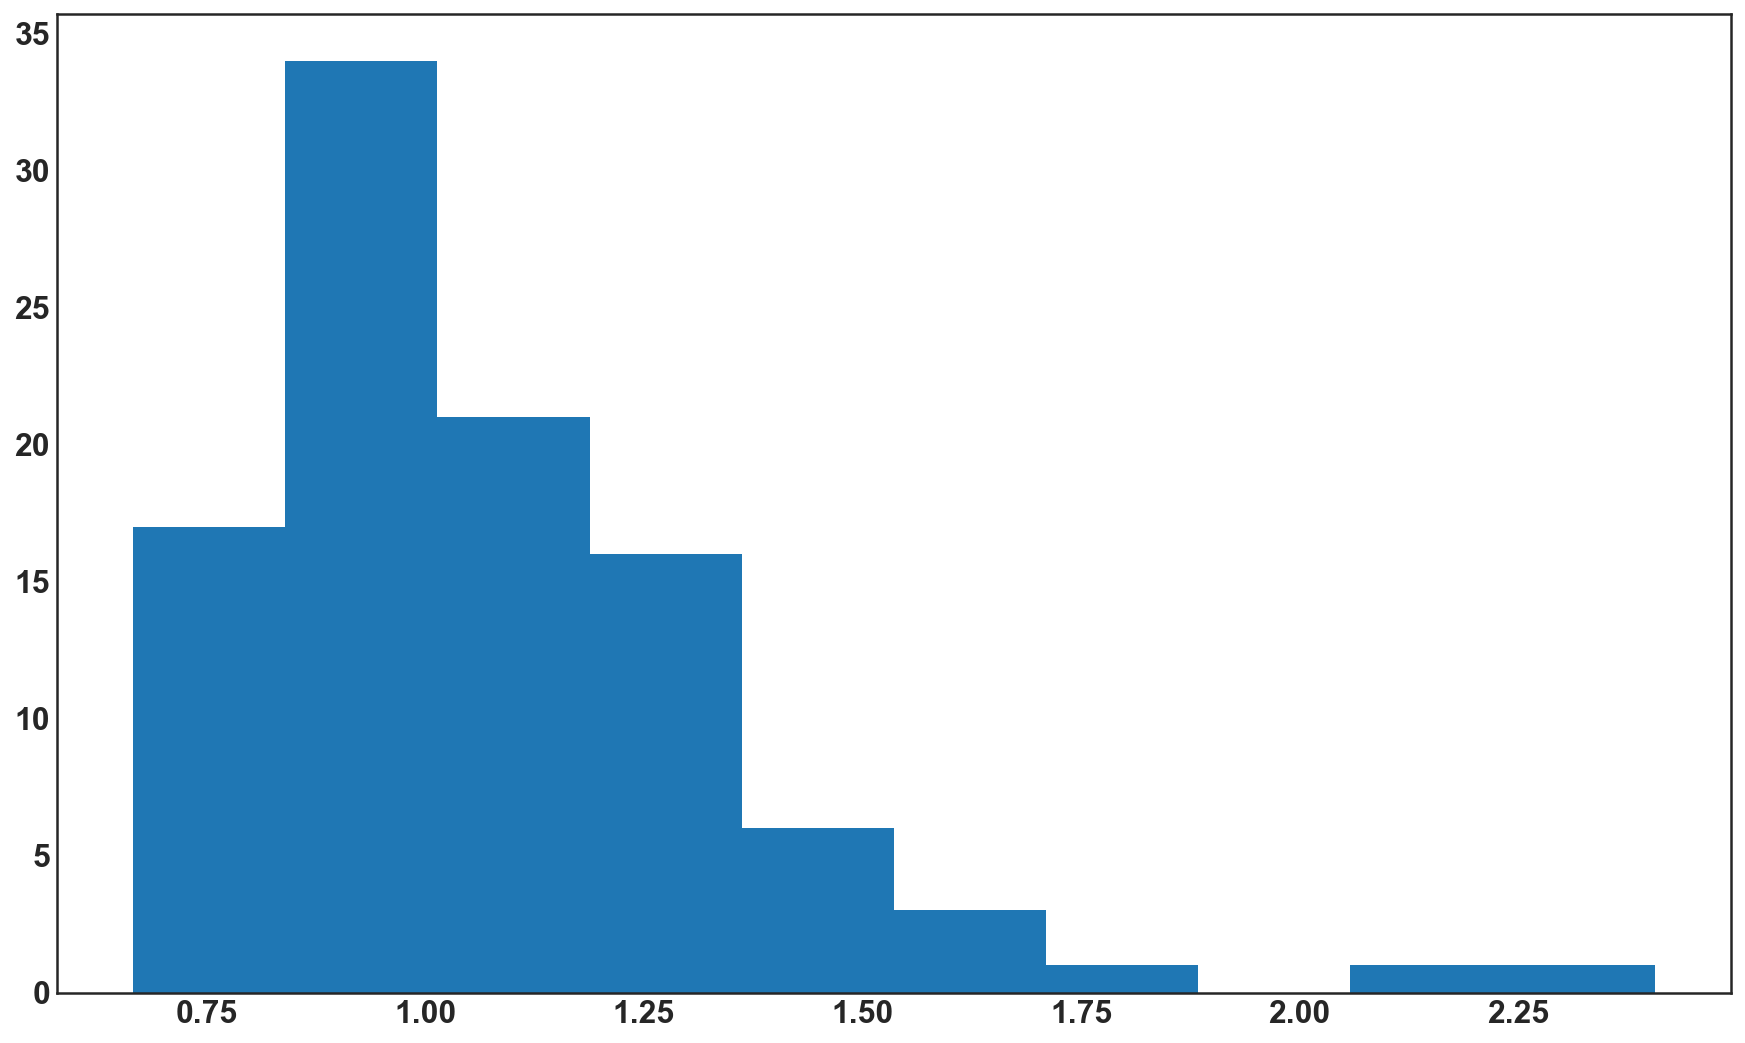

In [ ]:
plt.hist(e1[0, :])

In [ ]:
bin_start, bin_end, nominal_coverage, effective_coverage

<IPython.core.display.Javascript object>

(array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 array([0.95, 0.9 , 0.85, 0.8 , 0.75, 0.7 , 0.65, 0.6 , 0.55]),
 array([0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]),
 array([0.53495441, 0.43291359, 0.36126791, 0.29353018, 0.21971342,
        0.17498914, 0.12852801, 0.08771168, 0.04472427]))

# Tree Viz

In [ ]:
%cd
%cd ~/Google Drive/Papers/2_fluxnet/hourly_datasets

<IPython.core.display.Javascript object>

/Users/alireza_amani
/Users/alireza_amani/Google Drive/Papers/2_fluxnet/hourly_datasets


<IPython.core.display.Javascript object>

In [ ]:
d1["grid_search"].cv_results_

<IPython.core.display.Javascript object>

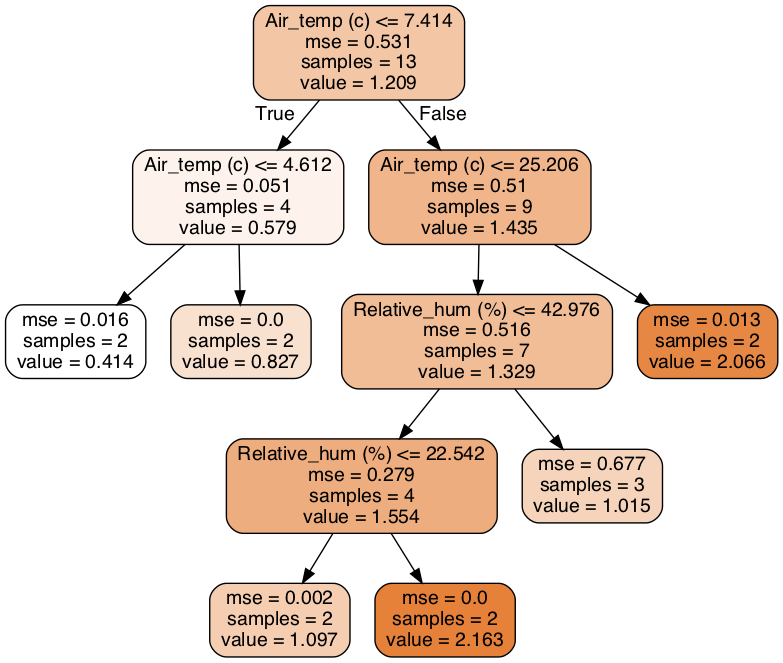

In [ ]:
# lets try it for rf set1 
from sklearn.tree import export_graphviz
from IPython.display import Image
seed(1997)
rf_test = RandomForestRegressor(n_estimators = 1, min_samples_leaf = 2, n_jobs = 6)
rf_test.fit(X_train_set1[["Air_temp (c)", "Relative_hum (%)"]].iloc[1:20, :], y_train_daily.iloc[1:20])
export_graphviz(rf_test.estimators_[0], feature_names = ["Air_temp (c)", "Relative_hum (%)"], 
                                      out_file = "ali.dot", rounded = True, filled = True)
!dot -Tpng ali.dot -o ali_tree.png -Gdpi=100
Image(filename = 'ali_tree.png')
